<a href="https://colab.research.google.com/github/yeonhas/yeonhas/blob/main/lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import os

print("before: %s"%os.getcwd())
os.chdir("/content/gdrive/My Drive/소방청 데이터")
print("after: %s"%os.getcwd())

before: /content
after: /content/gdrive/My Drive/소방청 데이터


라이브러리 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm # 폰트 관련 용도
warnings.filterwarnings(action='ignore') 

폰트 설치

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' #설치된 나눔글꼴 전체경로
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [ ]:
#우선 fm.rebuild()해준다.
fm._rebuild()

데이터 로딩 및 현황 파악

In [ ]:
df_fire = pd.read_csv('소방청_화재발생 주소정보_12_31_2017.csv', encoding='euc-kr')

In [ ]:
df_fire.head()

,화재발생년월일,시도,시군구,읍면동,화재유형,발화요인대분류,발화요인소분류,장소대분류,장소중분류,장소소분류,인명피해(명)소계,사망,부상,재산피해소계
0,2017-01-01 00:00,서울특별시,강남구,논현동,"건축,구조물",전기적 요인,미확인단락,주거,단독주택,상가주택(주택부분에서 화재가 발생한 경우에만 해당),0,0,0,13391
1,2017-01-01 00:09,경상북도,문경시,흥덕동,"건축,구조물",전기적 요인,절연열화에 의한 단락,생활서비스,음식점,한식,0,0,0,195
2,2017-01-01 00:14,경상남도,거제시,일운면,기타(쓰레기 화재등),부주의,"불씨,불꽃,화원방치",기타,야외,기타야외,0,0,0,22
3,2017-01-01 00:57,경기도,안산시상록구,본오동,"건축,구조물",부주의,음식물 조리중,주거,단독주택,다가구주택,0,0,0,1
4,2017-01-01 00:59,전라북도,익산시,인화동1가,"건축,구조물",방화의심,방화의심,"판매,업무시설",숙박시설,모텔,0,0,0,966


In [ ]:
print(df_fire.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44178 entries, 0 to 44177
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   화재발생년월일    44178 non-null  object
 1   시도         44178 non-null  object
 2   시군구        44178 non-null  object
 3   읍면동        44164 non-null  object
 4   화재유형       44178 non-null  object
 5   발화요인대분류    44178 non-null  object
 6   발화요인소분류    44178 non-null  object
 7   장소대분류      44178 non-null  object
 8   장소중분류      44178 non-null  object
 9   장소소분류      44178 non-null  object
 10  인명피해(명)소계  44178 non-null  int64 
 11  사망         44178 non-null  int64 
 12  부상         44178 non-null  int64 
 13  재산피해소계     44178 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 4.7+ MB
None


In [ ]:
#속성별 비어 있는 데이터의 합
pd.set_option('display.max_rows', 200)
print(df_fire.isnull().sum())

화재발생년월일       0
시도            0
시군구           0
읍면동          14
화재유형          0
발화요인대분류       0
발화요인소분류       0
장소대분류         0
장소중분류         0
장소소분류         0
인명피해(명)소계     0
사망            0
부상            0
재산피해소계        0
dtype: int64


데이터 전처리

In [ ]:
#화재 진압 시간이 없는 데이터는 삭제_null data가 없으므로 생략
#df_fire = df_fire[df_fire['화재진압시간'].notnull()]

In [ ]:
#분 단위로 진압시간을 변환
def timeConv(s):
  li = s.split(':')
  min = int(li[0])*60+int(li[1])
  return min

  df_fire['화재진압시간(분)'] = df_fire['화재진압시간'].map(lambda x : timeConv(x))

매트플롭(산점도)

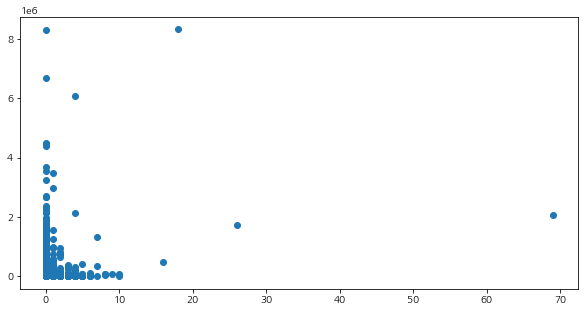

In [ ]:
x = df_fire['인명피해(명)소계'].values #화재진압시간과 재산피해소계 -> 변경
y = df_fire['재산피해소계'].values


plt.figure(figsize=(10, 5))
plt.scatter(x,y)
plt.show()

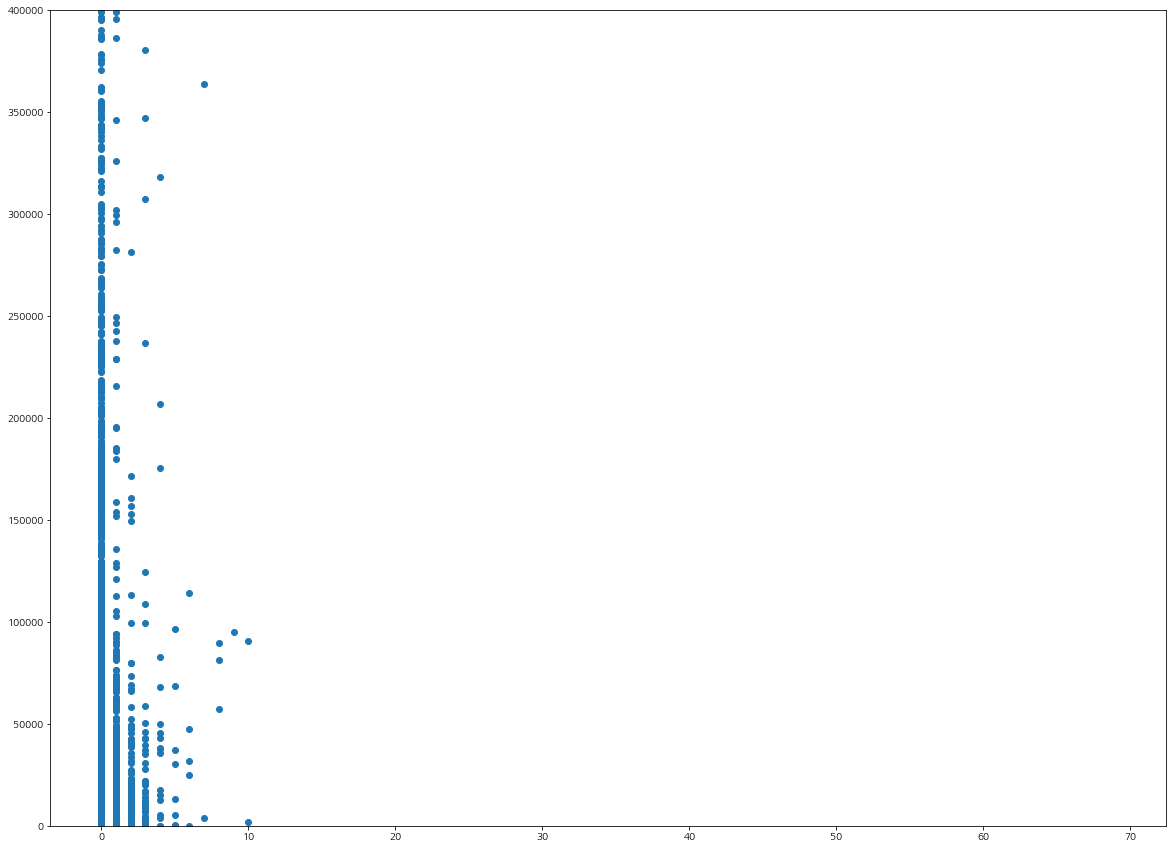

In [ ]:
x = df_fire['인명피해(명)소계'].values
y = df_fire['재산피해소계'].values


plt.figure(figsize=(20, 15))
plt.scatter(x,y)
plt.ylim(0, 400000)
plt.show()


Seaborn(카운트 플롯)-시도별 현황

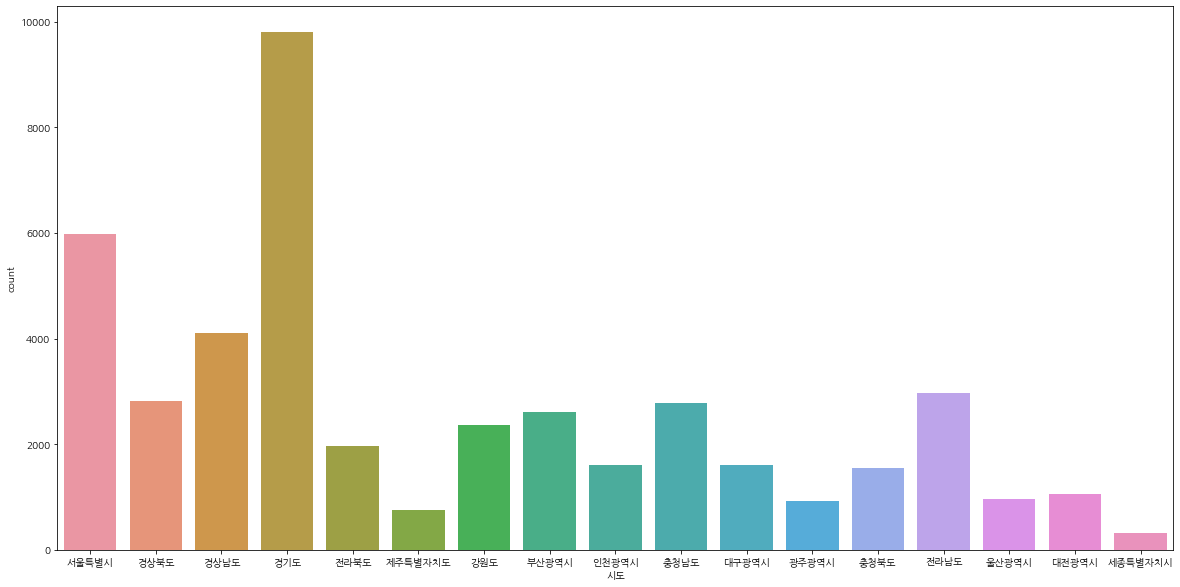

In [ ]:
#시도별 화재 현황
plt.figure(figsize=(20, 10))
sns.countplot(x="시도", data=df_fire)

Seaborn(박스 플롯)

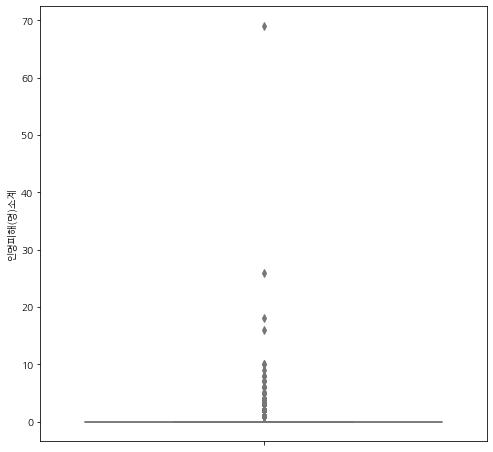

In [ ]:
#사고시 인명피해
plt.figure(figsize=(8, 8))
sns.boxplot(y="인명피해(명)소계", data=df_fire, palette="Paired")

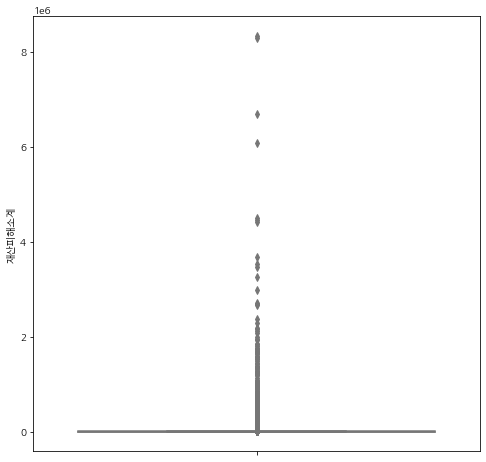

In [ ]:
#사고시 재산피해
plt.figure(figsize=(8, 8))
sns.boxplot(y="재산피해소계", data=df_fire, palette="Paired")

In [ ]:
#화재진압시간
#plt.figure(figsize=(8, 8))
#sns.boxplot(y="화재진압시간(분)", data=df_fire, palette="Paired")

In [ ]:
#시도별 화재진압시간
#plt.figure(figsize(16,8))
#sns.boxplot(x='시도', y="화재진압시간(분)".data=df_fire, palette="Paired")

In [ ]:
#장소별 화재진압시간
#plt.figure(figsize(16,8))
#sns.boxplot(x='장소대분류', y="화재진압시간(분)".data=df_fire, palette="Paired")

In [ ]:
#건물구조별 화재진압시간
#plt.figure(figsize(16,8))
#sns.boxplot(x='건물구조조', y="화재진압시간(분)".data=df_fire, palette="Paired")

In [ ]:
#장소별 화재진압시간(y축 조절)
#plt.figure(figsize(16,8))
#plt.ylim(0, 500)
#sns.boxplot(x='장소대분류', y="화재진압시간(분)".data=df_fire, palette="Paired")

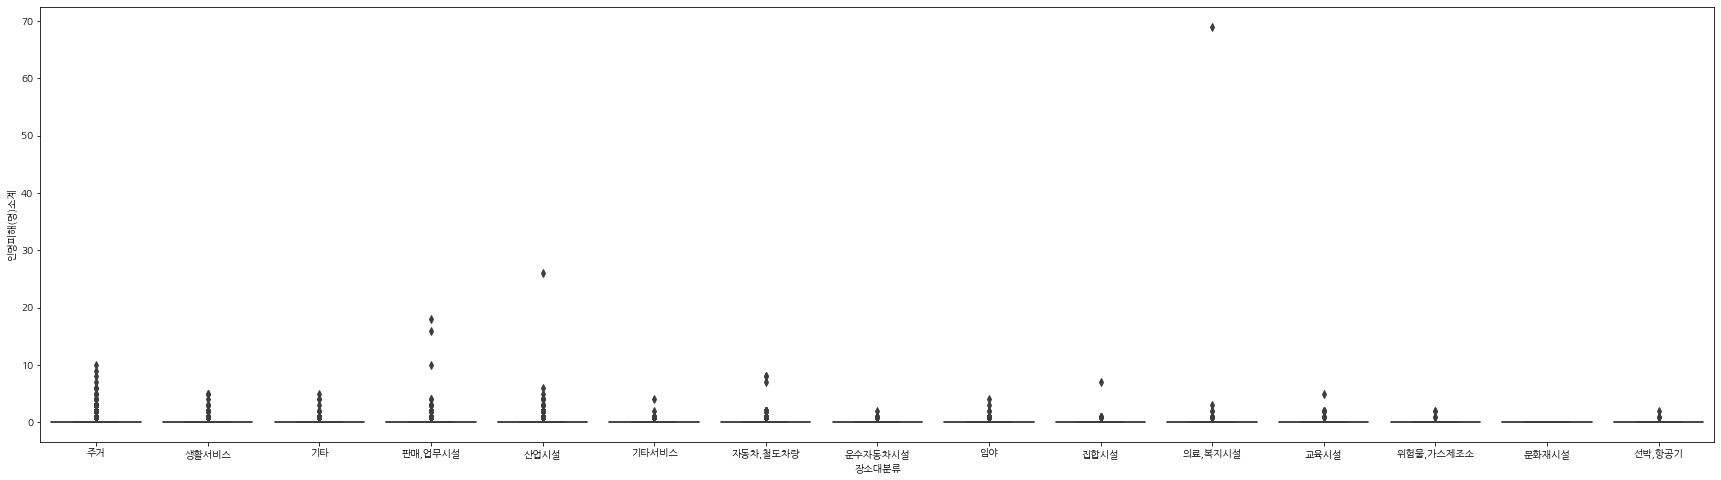

In [ ]:
#장소별 인명피해소계
plt.figure(figsize=(30, 8))
sns.boxplot(x='장소대분류', y="인명피해(명)소계", data=df_fire, palette="Paired")

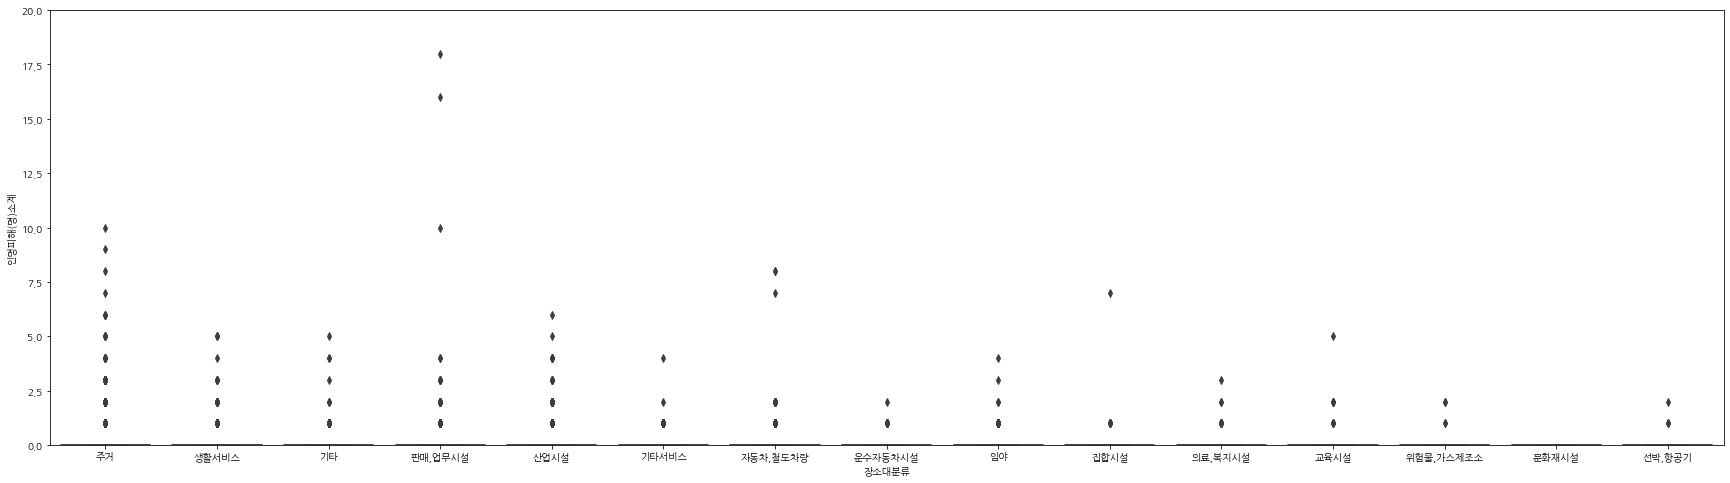

In [ ]:
#장소별 인명피해소계 (y축 조절)
plt.figure(figsize=(30, 8))
plt.ylim(0, 20)
sns.boxplot(x='장소대분류', y="인명피해(명)소계", data=df_fire, palette="Paired")

Seaborn (바이올릿 플롯)-시도별 현황

In [ ]:
df_fire_h = df_fire[(df_fire['인명피해(명)소계'] > 0)]
print(len(df_fire_h))

1591


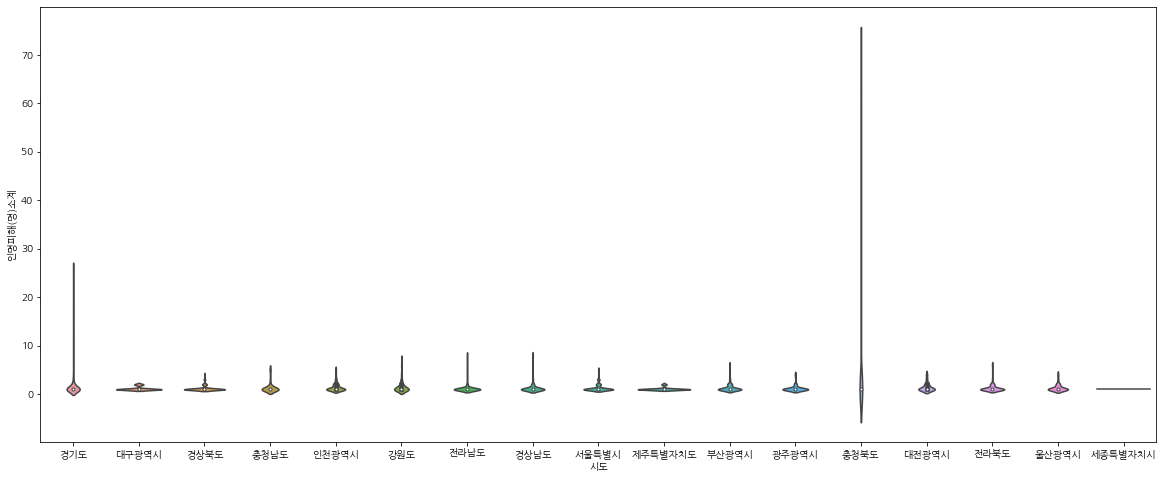

In [ ]:
#시도별 인명피해(명)소계
plt.figure(figsize=(20, 8))
sns.violinplot(data=df_fire_h, x="시도", y="인명피해(명)소계") #화재진압시간(분) -> 인명피해(명)소계
plt.show()

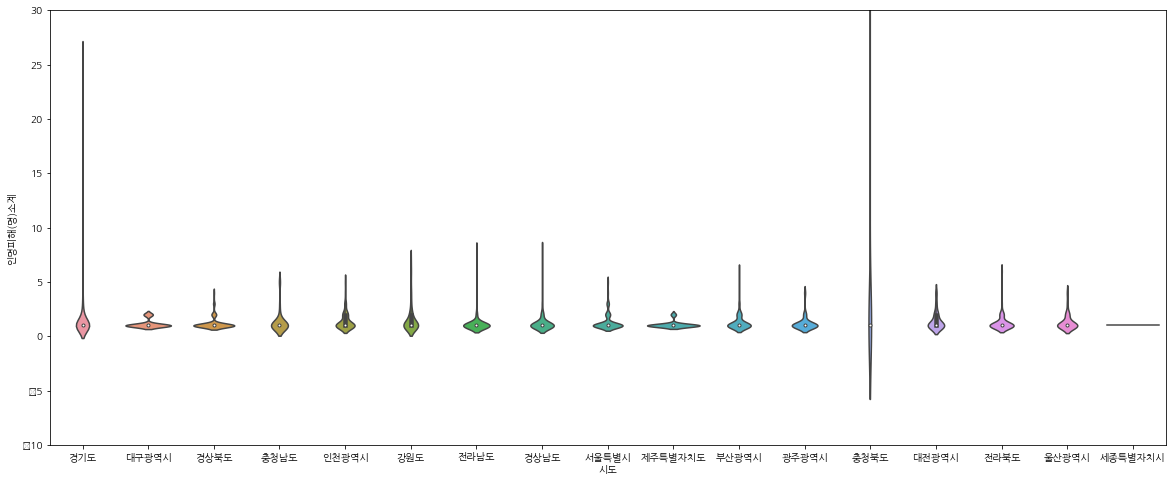

In [ ]:
#시도별 인명피해(명)소계 (y축 조절)
plt.figure(figsize=(20, 8))
plt.ylim(-10, 30)
sns.violinplot(data=df_fire_h, x="시도", y="인명피해(명)소계")
plt.show()

In [ ]:
plt.figure(figsize=(30,8))
plt.ylim(-50, 30)
sns.violinplot(data=df_fire_h, x="건물구조조", y="화재진압시간(분)")
plt.show()

In [ ]:
plt.figure(figsize=(30,8))
plt.ylim(-100, 1000)
sns.violinplot(data=df_fire_h,, x="장소대분류", y="인명피해(명)소계", data=df_fire_h,)